In [3]:
#all imports
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('forPredictions/2026predictedparkingdata_streamlined.csv')
df.head()



,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 General Spaces,LOT 4 Premium % Capacity,LOT 4 Premium Occupied,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces
0,1/1/2026,Thursday,0.527258,642.792556,1214,0.809905,279.417319,345,0.491138,584.620726,...,1430,0.929639,327.211238,350,0.129152,343.354141,2296,0.562081,751.141341,1337
1,1/2/2026,Friday,0.509745,621.379600,1214,0.764629,263.797007,345,0.539308,642.855187,...,1430,0.865187,304.545679,350,0.132229,354.161148,2296,0.588328,782.387639,1337
2,1/3/2026,Saturday,0.502386,612.409107,1214,0.756190,260.885471,345,0.526308,627.358690,...,1430,0.889009,312.955929,350,0.133018,361.262036,2296,0.606297,808.445131,1337
3,1/4/2026,Sunday,0.493098,601.086577,1214,0.711331,245.409052,345,0.514650,613.462319,...,1430,0.856413,301.251741,350,0.188634,476.893929,2296,0.543942,731.600061,1337
4,1/5/2026,Monday,0.505697,616.445107,1214,0.751551,259.285119,345,0.457503,545.177587,...,1430,0.886086,312.796886,350,0.143745,365.351832,2296,0.531519,700.942444,1337


In [43]:
r = df.sample(n=10)
r

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
97,2026-04-08,Wednesday,0.636124,775.219877,1214,0.818634,282.383917,345,0.588625,693.952414,...,0.150178,479.263294,2296,0.626376,811.469164,1337,4693.875303,8164,0.574948,2026-04
288,2026-10-16,Friday,0.642603,773.839682,1214,0.869604,299.565273,345,0.718764,854.329233,...,0.571925,1311.308567,2296,0.573053,771.821544,1337,5254.846121,8164,0.643661,2026-10
135,2026-05-16,Saturday,0.756799,918.754074,1214,0.756190,260.885471,345,0.656822,782.931522,...,0.545095,1251.538918,2296,0.573366,767.757194,1337,5108.443345,8164,0.625728,2026-05
105,2026-04-16,Thursday,0.672347,817.964151,1214,0.809905,279.417319,345,0.626674,740.963219,...,0.171312,543.755164,2296,0.670203,870.056532,1337,4817.724400,8164,0.590118,2026-04
37,2026-02-07,Saturday,0.617123,752.272815,1214,0.756190,260.885471,345,0.668620,792.275911,...,0.115678,326.249134,2296,0.674321,883.891925,1337,4138.161966,8164,0.506879,2026-02
298,2026-10-26,Monday,0.583423,709.038048,1214,0.628120,276.140166,345,0.563525,672.169720,...,0.464737,1072.846658,2296,0.504224,670.525289,1337,4576.511716,8164,0.560572,2026-10
220,2026-08-09,Sunday,0.733872,892.053544,1214,0.737323,255.808337,345,0.603592,723.495972,...,0.544272,1240.745952,2296,0.564990,753.971802,1337,4765.720527,8164,0.583748,2026-08
42,2026-02-12,Thursday,0.610646,744.377171,1214,0.809905,279.417319,345,0.624140,737.911877,...,0.100459,284.570609,2296,0.650712,847.524569,1337,4477.480461,8164,0.548442,2026-02
210,2026-07-30,Thursday,0.665609,971.943016,1214,0.694247,288.195964,345,0.518061,743.479476,...,0.433022,1198.065179,2296,0.430715,760.973071,1337,5171.215135,8164,0.633417,2026-07
1,2026-01-02,Friday,0.509745,621.379600,1214,0.764629,263.797007,345,0.539308,642.855187,...,0.132229,354.161148,2296,0.588328,782.387639,1337,3850.186443,8164,0.471605,2026-01


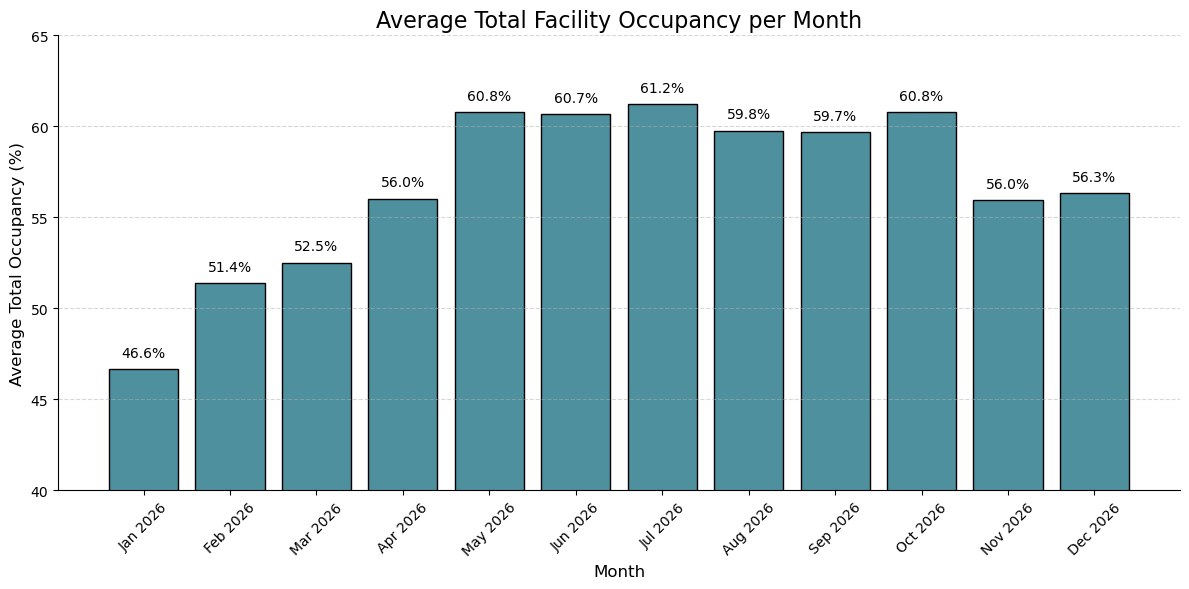

In [4]:

# --- Ensure datetime ---
df['Date'] = pd.to_datetime(df['Date'])

# --- Compute total occupancy across all lots per day ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)

df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)

df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']

# --- Group by month ---
df['Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 65)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [9]:
import pandas as pd
import numpy as np

# --- Copy base DataFrame ---
df_hypo = df.copy()

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Define month multipliers relative to January ---
# Jan = 0%, Feb = +1%, Mar = +2%, etc.
month_increase = {
    1: 0.00,  # January
    2: 0.01,  # February
    3: 0.02,
    4: 0.03,
    5: 0.04,
    6: 0.05,
    7: 0.06,
    8: 0.07,
    9: 0.08,
    10: 0.09,
    11: 0.10,
    12: 0.11
}

# --- Apply month multiplier ---
df_hypo['Month'] = df_hypo['Date'].dt.month
df_hypo['Multiplier'] = df_hypo['Month'].map(month_increase)

# --- Identify occupancy and capacity columns ---
occ_cols = [col for col in df_hypo.columns if "Occupied" in col]
space_cols = [col for col in df_hypo.columns if "Spaces" in col]
pct_cols = [col for col in df_hypo.columns if "% Capacity" in col]

# --- Adjust occupied counts based on month multiplier ---
for col in occ_cols:
    df_hypo[col] = df_hypo[col] * (1 + df_hypo['Multiplier'])

# --- Recalculate % capacity columns ---
for col in pct_cols:
    # find corresponding occupied + space columns
    base_name = col.split('% Capacity')[0].strip()
    occ_col = next((c for c in occ_cols if base_name in c), None)
    space_col = next((c for c in space_cols if base_name in c), None)
    
    if occ_col and space_col:
        df_hypo[col] = df_hypo[occ_col] / df_hypo[space_col]

# --- Drop helper columns ---
df_hypo = df_hypo.drop(columns=['Month', 'Multiplier'])

# --- Verify change ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Check average monthly change ---
monthly_check = (
    df_hypo
    .assign(Month=df_hypo['Date'].dt.to_period('M'))
    .groupby('Month')['Total % Capacity']
    .mean()
    .reset_index()
)
monthly_check['Month'] = monthly_check['Month'].dt.strftime('%b')
print(monthly_check)


   Month  Total % Capacity
0    Jan          0.466346
1    Feb          0.519064
2    Mar          0.535610
3    Apr          0.577105
4    May          0.632053
5    Jun          0.636935
6    Jul          0.649138
7    Aug          0.639527
8    Sep          0.644412
9    Oct          0.662712
10   Nov          0.615666
11   Dec          0.625402


In [15]:
df_hypo.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 4 Premium Spaces,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity
360,2026-12-27,Sunday,0.660597,801.964838,1214,0.848839,292.849441,345,0.739619,881.625675,...,350,0.599641,1376.775708,2296,0.461147,616.553544,1337,5116.784575,8164,0.626750
361,2026-12-28,Monday,0.648297,787.032234,1214,0.888451,306.515584,345,0.624982,744.978964,...,350,0.518667,1190.859790,2296,0.459689,614.604362,1337,4905.289334,8164,0.600844
362,2026-12-29,Tuesday,0.633623,769.218220,1214,0.932944,321.865659,345,0.578717,689.830151,...,350,0.465028,1067.704646,2296,0.420266,561.895672,1337,4784.477718,8164,0.586046
363,2026-12-30,Wednesday,0.670108,813.511327,1214,0.948215,327.134271,345,0.611240,728.598415,...,350,0.489982,1124.999139,2296,0.447719,598.600038,1337,4929.271513,8164,0.603781
364,2026-12-31,Thursday,0.655111,795.305274,1214,0.929760,320.767188,345,0.726481,865.965029,...,350,0.545797,1253.149820,2296,0.448420,599.538078,1337,5120.962465,8164,0.627261


In [17]:
df.tail()

,Date,DayOfWeek,LOT 2 General % Capacity,LOT 2 General Occupied,LOT 2 General Spaces,LOT 2 Premium % Capacity,LOT 2 Premium Occupied,LOT 2 Premium Spaces,LOT 3 % Capacity,LOT 3 Occupied,...,LOT 5 % Capacity,LOT 5 Occupied,LOT 5 Spaces,LOT 6 % Capacity,LOT 6 Occupied,LOT 6 Spaces,Total Occupied,Total Spaces,Total % Capacity,Month
360,2026-12-27,Sunday,0.594536,722.490845,1214,0.766110,263.828325,345,0.672250,794.257365,...,0.544644,1240.338476,2296,0.429751,555.453643,1337,4609.715833,8164,0.564639,2026-12
361,2026-12-28,Monday,0.583423,709.038048,1214,0.628120,276.140166,345,0.563525,671.152220,...,0.464737,1072.846658,2296,0.416328,553.697623,1337,4419.179580,8164,0.541301,2026-12
362,2026-12-29,Tuesday,0.574718,692.989387,1214,0.846965,289.969062,345,0.524234,621.468604,...,0.420423,961.896078,2296,0.389086,506.212317,1337,4310.340287,8164,0.527969,2026-12
363,2026-12-30,Wednesday,0.597160,732.893087,1214,0.845130,294.715559,345,0.543493,656.394968,...,0.438470,1013.512738,2296,0.404034,539.279313,1337,4440.785147,8164,0.543947,2026-12
364,2026-12-31,Thursday,0.592763,716.491238,1214,0.846354,288.979448,345,0.660077,780.148675,...,0.493929,1128.963802,2296,0.410798,540.124394,1337,4613.479698,8164,0.565100,2026-12


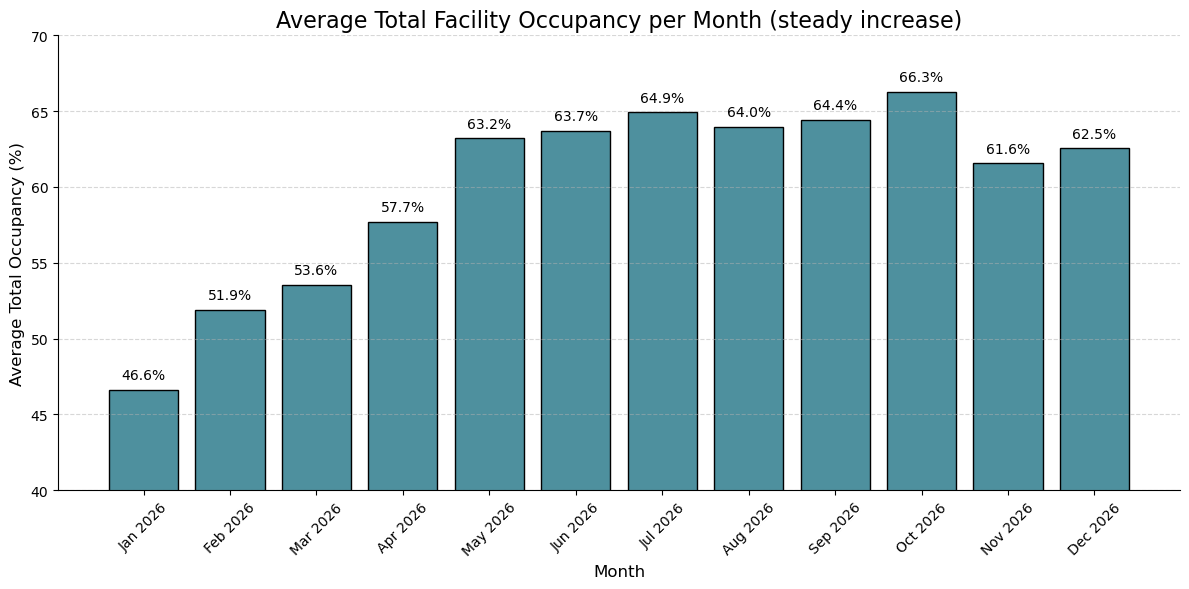

In [61]:

# --- Ensure datetime ---
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total occupancy across all lots per day ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)

df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)

df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']

# --- Group by month ---
df_hypo['Month'] = df_hypo['Date'].dt.to_period('M')
monthly_avg = df_hypo.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()
monthly_avg['Average %'] = monthly_avg['Total % Capacity'] * 100

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg['Month'].dt.strftime('%b %Y'),
    monthly_avg['Average %'],
    color='#4e909e',
    edgecolor='black'
)

# --- Add percentage labels ---
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}%',
        ha='center',
        va='bottom',
        fontsize=10
    )

# --- Styling ---
plt.title("Average Total Facility Occupancy per Month (steady increase)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 70)

# --- Save figure ---
plt.savefig(
    "avg_monthly_total_occupancy.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [23]:
# --- Ensure datetime in both ---
df['Date'] = pd.to_datetime(df['Date'])
df_hypo['Date'] = pd.to_datetime(df_hypo['Date'])

# --- Compute total % capacity per month for original df ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)
df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)
df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']
monthly_orig = df.groupby(df['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_orig['Month'] = monthly_orig['Date'].dt.to_timestamp()

# --- Compute total % capacity per month for hypothetical df ---
df_hypo['Total Occupied'] = (
    df_hypo['LOT 2 General Occupied'] + df_hypo['LOT 2 Premium Occupied'] +
    df_hypo['LOT 3 Occupied'] + df_hypo['LOT 4 General Occupied'] +
    df_hypo['LOT 4 Premium Occupied'] + df_hypo['LOT 5 Occupied'] +
    df_hypo['LOT 6 Occupied']
)
df_hypo['Total Spaces'] = (
    df_hypo['LOT 2 General Spaces'] + df_hypo['LOT 2 Premium Spaces'] +
    df_hypo['LOT 3 Spaces'] + df_hypo['LOT 4 General Spaces'] +
    df_hypo['LOT 4 Premium Spaces'] + df_hypo['LOT 5 Spaces'] +
    df_hypo['LOT 6 Spaces']
)
df_hypo['Total % Capacity'] = df_hypo['Total Occupied'] / df_hypo['Total Spaces']
monthly_hypo = df_hypo.groupby(df_hypo['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_hypo['Month'] = monthly_hypo['Date'].dt.to_timestamp()

# --- Merge and compute percent difference ---
monthly_compare = monthly_orig.merge(
    monthly_hypo,
    on='Month',
    suffixes=('_orig', '_hypo')
)

monthly_compare['Percent Diff'] = (
    (monthly_compare['Total % Capacity_hypo'] - monthly_compare['Total % Capacity_orig'])
    / monthly_compare['Total % Capacity_orig'] * 100
)

# --- Display ---
monthly_compare[['Month', 'Total % Capacity_orig', 'Total % Capacity_hypo', 'Percent Diff']]


,Month,Total % Capacity_orig,Total % Capacity_hypo,Percent Diff
0,2026-01-01,0.466346,0.466346,0.0
1,2026-02-01,0.513925,0.519064,1.0
2,2026-03-01,0.525108,0.535610,2.0
3,2026-04-01,0.560296,0.577105,3.0
4,2026-05-01,0.607743,0.632053,4.0
5,2026-06-01,0.606604,0.636935,5.0
6,2026-07-01,0.612394,0.649138,6.0
7,2026-08-01,0.597689,0.639527,7.0
8,2026-09-01,0.596678,0.644412,8.0
9,2026-10-01,0.607993,0.662712,9.0


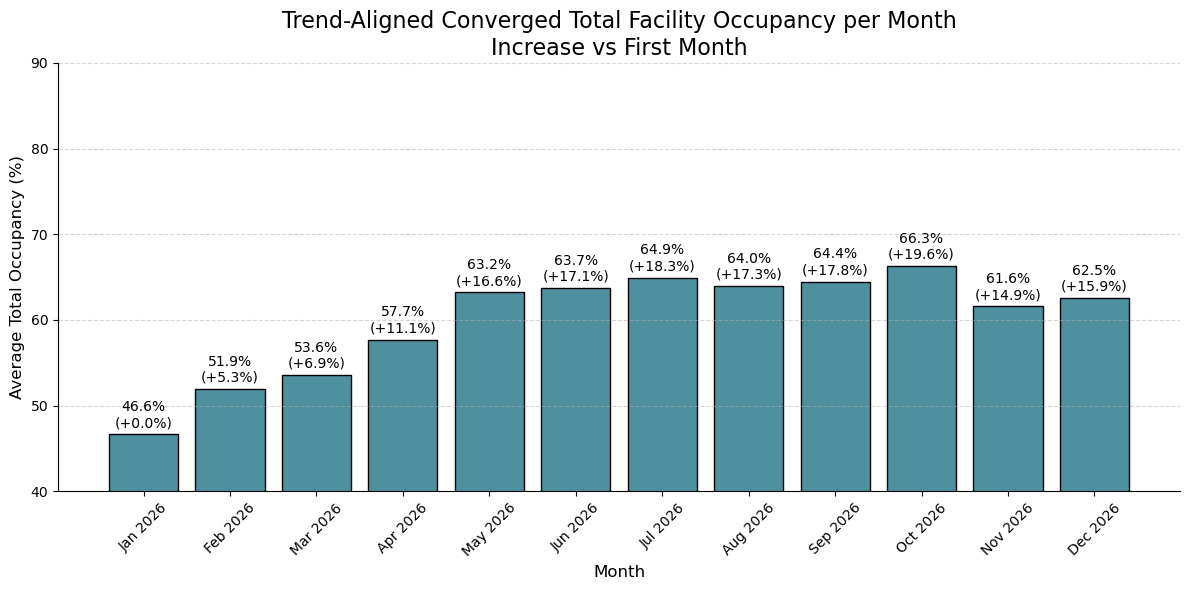

,Month,Total % Capacity,Average %,Increase vs First Month %
0,2026-01-01,0.466346,46.634581,0.000000
1,2026-02-01,0.519064,51.906392,5.271811
2,2026-03-01,0.535610,53.561009,6.926428
3,2026-04-01,0.577105,57.710514,11.075933
4,2026-05-01,0.632053,63.205314,16.570732
5,2026-06-01,0.636935,63.693460,17.058879
6,2026-07-01,0.649138,64.913816,18.279235
7,2026-08-01,0.639527,63.952733,17.318151
8,2026-09-01,0.644412,64.441231,17.806650
9,2026-10-01,0.662712,66.271208,19.636626


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copy and prep ---
df_hypo_converge = df_hypo.copy()
df_hypo_converge['Date'] = pd.to_datetime(df_hypo_converge['Date'])

# --- Compute total occupancy and total % ---
df_hypo_converge['Total Occupied'] = (
    df_hypo_converge['LOT 2 General Occupied'] + df_hypo_converge['LOT 2 Premium Occupied'] +
    df_hypo_converge['LOT 3 Occupied'] + df_hypo_converge['LOT 4 General Occupied'] +
    df_hypo_converge['LOT 4 Premium Occupied'] + df_hypo_converge['LOT 5 Occupied'] +
    df_hypo_converge['LOT 6 Occupied']
)
df_hypo_converge['Total Spaces'] = (
    df_hypo_converge['LOT 2 General Spaces'] + df_hypo_converge['LOT 2 Premium Spaces'] +
    df_hypo_converge['LOT 3 Spaces'] + df_hypo_converge['LOT 4 General Spaces'] +
    df_hypo_converge['LOT 4 Premium Spaces'] + df_hypo_converge['LOT 5 Spaces'] +
    df_hypo_converge['LOT 6 Spaces']
)
df_hypo_converge['Total % Capacity'] = df_hypo_converge['Total Occupied'] / df_hypo_converge['Total Spaces']

# --- Monthly total trend ---
df_hypo_converge['Month'] = df_hypo_converge['Date'].dt.to_period('M')
monthly_trend = df_hypo_converge.groupby('Month')['Total % Capacity'].mean()
df_hypo_converge['Trend %'] = df_hypo_converge['Month'].map(monthly_trend)

# --- Strong but trend-aligned convergence ---
lot_pct_cols = [
    'LOT 2 General % Capacity', 'LOT 2 Premium % Capacity',
    'LOT 3 % Capacity', 'LOT 4 General % Capacity',
    'LOT 4 Premium % Capacity', 'LOT 5 % Capacity',
    'LOT 6 % Capacity'
]
convergence_factor = 0.5

for i in range(len(df_hypo_converge)):
    trend_pct = df_hypo_converge.loc[i, 'Trend %']
    total_occ = df_hypo_converge.loc[i, 'Total Occupied']

    current_pcts = df_hypo_converge.loc[i, lot_pct_cols].values
    spaces = np.array([df_hypo_converge.loc[i, col.replace('% Capacity', 'Spaces').strip()] for col in lot_pct_cols])

    new_pcts = current_pcts + convergence_factor * (trend_pct - current_pcts)
    new_occ = new_pcts * spaces
    scale_factor = total_occ / new_occ.sum()
    new_occ *= scale_factor
    new_pcts = new_occ / spaces

    for col, pct, occ in zip(lot_pct_cols, new_pcts, new_occ):
        df_hypo_converge.at[i, col] = pct
        occ_col = col.replace('% Capacity', 'Occupied').strip()
        df_hypo_converge.at[i, occ_col] = occ

# --- Recalculate totals ---
df_hypo_converge['Total Occupied'] = df_hypo_converge[[
    'LOT 2 General Occupied','LOT 2 Premium Occupied','LOT 3 Occupied',
    'LOT 4 General Occupied','LOT 4 Premium Occupied','LOT 5 Occupied','LOT 6 Occupied'
]].sum(axis=1)
df_hypo_converge['Total % Capacity'] = df_hypo_converge['Total Occupied'] / df_hypo_converge['Total Spaces']

# --- Monthly averages ---
monthly_avg_converge = df_hypo_converge.groupby('Month')['Total % Capacity'].mean().reset_index()
monthly_avg_converge['Month'] = monthly_avg_converge['Month'].dt.to_timestamp()
monthly_avg_converge['Average %'] = monthly_avg_converge['Total % Capacity'] * 100

# --- Compute increase relative to first month ---
first_value = monthly_avg_converge.loc[0, 'Average %']
monthly_avg_converge['Increase vs First Month %'] = (monthly_avg_converge['Average %'] - first_value)

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(
    monthly_avg_converge['Month'].dt.strftime('%b %Y'),
    monthly_avg_converge['Average %'],
    color='#4e909e',
    edgecolor='black'
)

for bar, inc in zip(bars, monthly_avg_converge['Increase vs First Month %']):
    height = bar.get_height()
    label = f'{height:.1f}%'
    if not np.isnan(inc):
        label += f'\n(+{inc:.1f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, label, ha='center', va='bottom', fontsize=10)

plt.title("Trend-Aligned Converged Total Facility Occupancy per Month\nIncrease vs First Month", fontsize=16, fontweight='normal')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Total Occupancy (%)", fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.ylim(40, 90)
plt.show()



In [69]:
# --- Ensure datetime in both ---
df['Date'] = pd.to_datetime(df['Date'])
df_hypo_converge['Date'] = pd.to_datetime(df_hypo_converge['Date'])

# --- Original monthly totals ---
df['Total Occupied'] = (
    df['LOT 2 General Occupied'] + df['LOT 2 Premium Occupied'] +
    df['LOT 3 Occupied'] + df['LOT 4 General Occupied'] +
    df['LOT 4 Premium Occupied'] + df['LOT 5 Occupied'] +
    df['LOT 6 Occupied']
)
df['Total Spaces'] = (
    df['LOT 2 General Spaces'] + df['LOT 2 Premium Spaces'] +
    df['LOT 3 Spaces'] + df['LOT 4 General Spaces'] +
    df['LOT 4 Premium Spaces'] + df['LOT 5 Spaces'] +
    df['LOT 6 Spaces']
)
df['Total % Capacity'] = df['Total Occupied'] / df['Total Spaces']
monthly_orig = df.groupby(df['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_orig['Month'] = monthly_orig['Date'].dt.to_timestamp()

# --- Streamlined hypothetical monthly totals ---
df_hypo_converge['Total Occupied'] = (
    df_hypo_converge['LOT 2 General Occupied'] + df_hypo_converge['LOT 2 Premium Occupied'] +
    df_hypo_converge['LOT 3 Occupied'] + df_hypo_converge['LOT 4 General Occupied'] +
    df_hypo_converge['LOT 4 Premium Occupied'] + df_hypo_converge['LOT 5 Occupied'] +
    df_hypo_converge['LOT 6 Occupied']
)
df_hypo_converge['Total Spaces'] = (
    df_hypo_converge['LOT 2 General Spaces'] + df_hypo_converge['LOT 2 Premium Spaces'] +
    df_hypo_converge['LOT 3 Spaces'] + df_hypo_converge['LOT 4 General Spaces'] +
    df_hypo_converge['LOT 4 Premium Spaces'] + df_hypo_converge['LOT 5 Spaces'] +
    df_hypo_converge['LOT 6 Spaces']
)
df_hypo_converge['Total % Capacity'] = df_hypo_converge['Total Occupied'] / df_hypo_converge['Total Spaces']
monthly_hypo_streamlined = df_hypo_converge.groupby(df_hypo_converge['Date'].dt.to_period('M'))['Total % Capacity'].mean().reset_index()
monthly_hypo_streamlined['Month'] = monthly_hypo_streamlined['Date'].dt.to_timestamp()

# --- Merge and compute percent difference vs original ---
monthly_compare_streamlined = monthly_orig.merge(
    monthly_hypo_streamlined,
    on='Month',
    suffixes=('_orig', '_hypo_streamlined')
)

monthly_compare_streamlined['Percent Diff'] = (
    (monthly_compare_streamlined['Total % Capacity_hypo_streamlined'] - monthly_compare_streamlined['Total % Capacity_orig'])
    / monthly_compare_streamlined['Total % Capacity_orig'] * 100
)

# --- Display ---
monthly_compare_streamlined[['Month', 'Total % Capacity_orig', 'Total % Capacity_hypo_streamlined', 'Percent Diff']]


,Month,Total % Capacity_orig,Total % Capacity_hypo_streamlined,Percent Diff
0,2026-01-01,0.466346,0.466346,0.0
1,2026-02-01,0.513925,0.519064,1.0
2,2026-03-01,0.525108,0.535610,2.0
3,2026-04-01,0.560296,0.577105,3.0
4,2026-05-01,0.607743,0.632053,4.0
5,2026-06-01,0.606604,0.636935,5.0
6,2026-07-01,0.612394,0.649138,6.0
7,2026-08-01,0.597689,0.639527,7.0
8,2026-09-01,0.596678,0.644412,8.0
9,2026-10-01,0.607993,0.662712,9.0


C:\Users\benja\AppData\Local\Temp\ipykernel_14044\707020913.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg.index, rotation=45, ha='right')
C:\Users\benja\AppData\Local\Temp\ipykernel_14044\707020913.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg.index, rotation=45, ha='right')
C:\Users\benja\AppData\Local\Temp\ipykernel_14044\707020913.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(avg.index, rotation=45, ha='right')


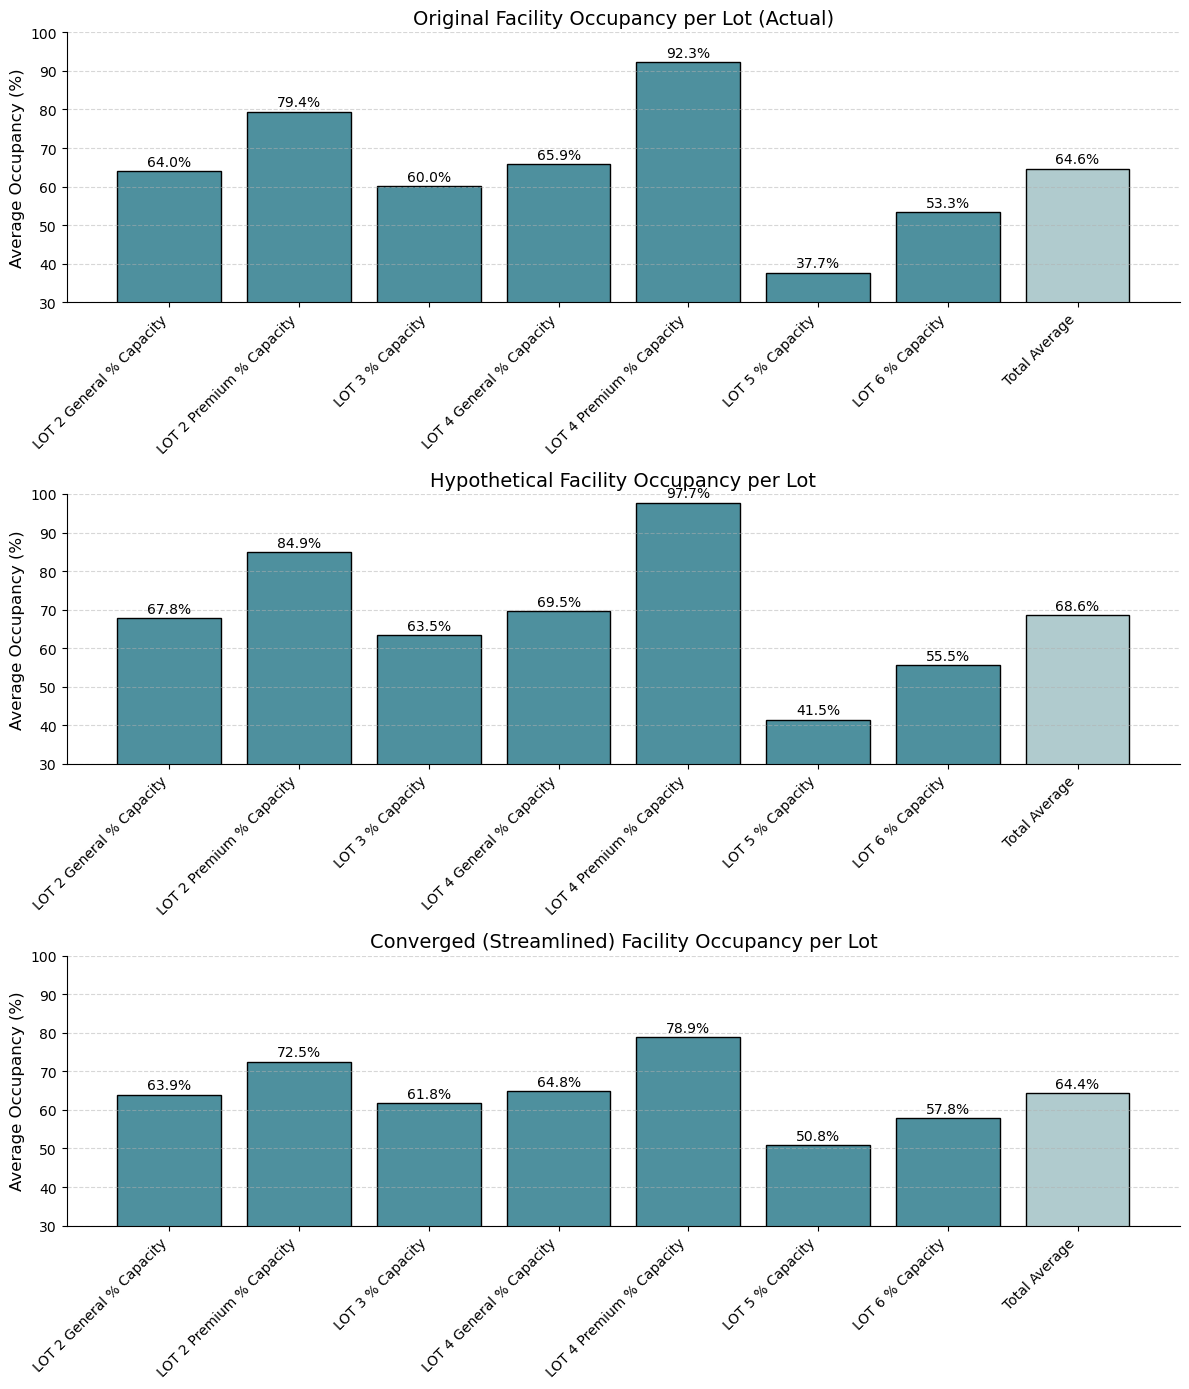

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Helper: compute yearly lot averages ---
def compute_lot_averages(df):
    lot_pct_cols = [
        'LOT 2 General % Capacity', 'LOT 2 Premium % Capacity',
        'LOT 3 % Capacity', 'LOT 4 General % Capacity',
        'LOT 4 Premium % Capacity', 'LOT 5 % Capacity',
        'LOT 6 % Capacity'
    ]
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    yearly_avg = df[lot_pct_cols].mean() * 100  # convert to %
    total_avg = yearly_avg.mean()                # compute total average across all lots
    yearly_avg['Total Average'] = total_avg      # append total average
    return yearly_avg

# --- Compute averages for each dataset ---
avg_df = compute_lot_averages(df)
avg_hypo = compute_lot_averages(df_hypo)
avg_converge = compute_lot_averages(df_hypo_converge)

# --- Plot setup ---
fig, axes = plt.subplots(3, 1, figsize=(12, 14), sharey=True)

datasets = [
    (avg_df, "Original Facility Occupancy per Lot (Actual)"),
    (avg_hypo, "Hypothetical Facility Occupancy per Lot"),
    (avg_converge, "Converged (Streamlined) Facility Occupancy per Lot")
]

# --- Styling variables ---
bar_color = "#4e909e"
avg_color = "#b0cbce"
edge_color = "black"

for ax, (avg, title) in zip(axes, datasets):
    colors = [bar_color] * (len(avg) - 1) + [avg_color]  # last bar (Total Average) different color
    bars = ax.bar(avg.index, avg.values, color=colors, edgecolor=edge_color)
    
    # Add labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.6,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10
        )
    
    # Style
    ax.set_title(title, fontsize=14, fontweight='normal')
    ax.set_ylabel("Average Occupancy (%)", fontsize=12)
    ax.set_xticklabels(avg.index, rotation=45, ha='right')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    sns.despine(ax=ax)
    ax.set_ylim(30, 100)

plt.tight_layout()
plt.savefig("lot_facility_comparison_yearly_with_total.png", dpi=300, bbox_inches='tight')
plt.show()
